In [3]:
import numpy as np
import pandas as pd

In [4]:
apt = pd.read_csv('중구아파트.csv')

In [5]:
df = apt[['아파트코드','전용면적(㎡)', '계약년월', '건축년도', '주차대수','범죄율', '건물연식',
'대규모점포_거리', '버스정류장_거리', '지하철역_거리', '학교_거리', '유치원_거리', '병원_거리',
'거래금액(만원)','주택구매력지수', 'RIR','LIR']]

In [6]:
df['area']=df['전용면적(㎡)'].round(-1)

c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.pop('전용면적(㎡)')

0         84.9866
1         84.9866
2         84.9866
3         84.9846
4         84.9581
           ...   
12853    146.9679
12854    147.3212
12855    124.2102
12856    146.9679
12857    147.3270
Name: 전용면적(㎡), Length: 12858, dtype: float64

In [8]:
df['price'] = 0
for i in df.index:
    if type(df['거래금액(만원)'][i]) == str:
        df['price'][i] = df['거래금액(만원)'][i].replace(',','')
    else: 
        df['price'][i] = df['거래금액(만원)'][i]
df   

c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

,아파트코드,계약년월,건축년도,주차대수,범죄율,건물연식,대규모점포_거리,버스정류장_거리,지하철역_거리,학교_거리,유치원_거리,병원_거리,거래금액(만원),주택구매력지수,RIR,LIR,area,price
0,A10080701,201608.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64700.0,62.082580,7.04,3.06,80.0,64700.0
1,A10080701,201608.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,72000.0,62.082580,7.04,3.06,80.0,72000.0
2,A10080701,201609.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,72000.0,60.222390,7.56,3.24,80.0,72000.0
3,A10080701,201612.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,69500.0,54.946911,7.85,3.58,80.0,69500.0
4,A10080701,201612.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,76000.0,54.946911,7.85,3.58,80.0,76000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"68,494",63.157309,7.20,2.99,150.0,68494
12854,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"67,787",63.157309,7.20,2.99,150.0,67787
12855,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"77,204",63.157309,7.20,2.99,120.0,77204
12856,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"99,020",63.157309,7.20,2.99,150.0,99020


In [9]:
df = df.astype({'price':'float64'})

In [10]:
df['price']=df.groupby(['계약년월','아파트코드','area'])['price'].transform('mean')

In [11]:
df['아파트구분'] = df['아파트코드'].map(str) +'_' +df['area'].map(int).map(str)

In [12]:
df

,아파트코드,계약년월,건축년도,주차대수,범죄율,건물연식,대규모점포_거리,버스정류장_거리,지하철역_거리,학교_거리,유치원_거리,병원_거리,거래금액(만원),주택구매력지수,RIR,LIR,area,price,아파트구분
0,A10080701,201608.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64700.0,62.082580,7.04,3.06,80.0,68350.00,A10080701_80
1,A10080701,201608.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,72000.0,62.082580,7.04,3.06,80.0,68350.00,A10080701_80
2,A10080701,201609.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,72000.0,60.222390,7.56,3.24,80.0,72000.00,A10080701_80
3,A10080701,201612.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,69500.0,54.946911,7.85,3.58,80.0,71075.00,A10080701_80
4,A10080701,201612.0,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,76000.0,54.946911,7.85,3.58,80.0,71075.00,A10080701_80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"68,494",63.157309,7.20,2.99,150.0,76068.25,A10095502_150
12854,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"67,787",63.157309,7.20,2.99,150.0,76068.25,A10095502_150
12855,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"77,204",63.157309,7.20,2.99,120.0,78516.00,A10095502_120
12856,A10095502,201512.0,2014.0,617.0,2.59041,6.0,0.018084,0.192776,0.118238,0.180272,0.217184,0.002898,"99,020",63.157309,7.20,2.99,150.0,76068.25,A10095502_150


In [13]:
df = df.drop_duplicates(subset=['아파트구분','계약년월'])

In [14]:
df.pop('거래금액(만원)')

0               64700.0
2               72000.0
3               69500.0
7               68700.0
8               66900.0
              ...      
12836           148,283
12841           100,289
12843            79,398
12848            79,828
12849            68,118
Name: 거래금액(만원), Length: 4128, dtype: object

In [15]:
df['date'] = df['계약년월']
df = df.set_index('계약년월')

c:\Users\46861\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df = df.sort_values(by=["아파트구분", "date"], ascending=[True, True]) 

In [17]:
df

,아파트코드,건축년도,주차대수,범죄율,건물연식,대규모점포_거리,버스정류장_거리,지하철역_거리,학교_거리,유치원_거리,병원_거리,주택구매력지수,RIR,LIR,area,price,아파트구분,date
계약년월,,,,,,,,,,,,,,,,,,
202202.0,A10024359,2020.0,89.0,2.59041,1.0,0.610472,0.019465,0.286507,0.177679,0.487640,0.086717,36.735880,13.74,1.60,10.0,26000.0,A10024359_10,202202.0
202203.0,A10024359,2020.0,89.0,2.59041,1.0,0.610472,0.019465,0.286507,0.177679,0.487640,0.086717,36.812733,NaN,NaN,10.0,28000.0,A10024359_10,202203.0
202203.0,A10024359,2020.0,89.0,2.59041,1.0,0.610472,0.019465,0.286507,0.177679,0.487640,0.086717,36.812733,NaN,NaN,20.0,50169.0,A10024359_20,202203.0
202204.0,A10024359,2020.0,89.0,2.59041,1.0,0.610472,0.019465,0.286507,0.177679,0.487640,0.086717,NaN,NaN,NaN,20.0,38000.0,A10024359_20,202204.0
202205.0,A10024359,2020.0,89.0,2.59041,1.0,0.610472,0.019465,0.286507,0.177679,0.487640,0.086717,NaN,NaN,NaN,20.0,42000.0,A10024359_20,202205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201810.0,A13302201,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,40.168482,7.72,3.50,80.0,62700.0,A13302201_80,201810.0
202009.0,A13302201,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,45.989589,8.98,4.44,80.0,89500.0,A13302201_80,202009.0
202010.0,A13302201,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,44.830585,8.77,4.44,80.0,90000.0,A13302201_80,202010.0


In [18]:
codes = df['아파트구분'].unique()

In [19]:
codes

array(['A10024359_10', 'A10024359_20', 'A10024359_30', 'A10024756_40',
       'A10024756_50', 'A10024756_60', 'A10024756_80', 'A10024801_120',
       'A10024801_140', 'A10024801_150', 'A10024801_190', 'A10024801_80',
       'A10025223_20', 'A10025223_40', 'A10025372_60', 'A10025372_70',
       'A10026517_70', 'A10026517_80', 'A10026849_100', 'A10026849_50',
       'A10026849_60', 'A10026881_60', 'A10026881_70', 'A10026881_80',
       'A10027364_120', 'A10027364_30', 'A10027364_40', 'A10027364_60',
       'A10027364_70', 'A10027364_80', 'A10028201_140', 'A10028201_40',
       'A10028201_50', 'A10028201_80', 'A10028201_90', 'A10044001_110',
       'A10044001_60', 'A10044001_80', 'A10044002_110', 'A10044002_60',
       'A10044002_80', 'A10045001_110', 'A10045001_150', 'A10045001_60',
       'A10045001_80', 'A10045002_120', 'A10045002_150', 'A10045002_60',
       'A10045002_80', 'A10045301_110', 'A10045301_60', 'A10045301_80',
       'A10045302_110', 'A10045302_60', 'A10045302_80', 'A10045

In [20]:
groups = df.groupby(df.아파트구분)

In [21]:
for i in codes:
    globals()['df_'+i] = groups.get_group(i)

In [22]:
df_A10024359_10

,아파트코드,건축년도,주차대수,범죄율,건물연식,대규모점포_거리,버스정류장_거리,지하철역_거리,학교_거리,유치원_거리,병원_거리,주택구매력지수,RIR,LIR,area,price,아파트구분,date
계약년월,,,,,,,,,,,,,,,,,,
202202.0,A10024359,2020.0,89.0,2.59041,1.0,0.610472,0.019465,0.286507,0.177679,0.48764,0.086717,36.735880,13.74,1.6,10.0,26000.0,A10024359_10,202202.0
202203.0,A10024359,2020.0,89.0,2.59041,1.0,0.610472,0.019465,0.286507,0.177679,0.48764,0.086717,36.812733,NaN,NaN,10.0,28000.0,A10024359_10,202203.0


In [23]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
      cols.append(df.shift(i))
      names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
          names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
          names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
      agg.dropna(inplace=True)
  return agg

In [25]:
df_all = pd.DataFrame()
for i in codes:
    df1 = globals()['df_'+i]
    df1 = df1[['price','건축년도','주차대수','범죄율','건물연식','대규모점포_거리','버스정류장_거리','지하철역_거리','학교_거리','유치원_거리','병원_거리','주택구매력지수','RIR','LIR','area']]
    values = df1.values
    values = values.astype('float32')
    reframed = series_to_supervised(values, 3, 1)
    reframed.drop(reframed.columns[46:60], axis=1, inplace=True)
    reframed.drop(reframed.columns[16:30], axis=1, inplace=True)
    reframed.drop(reframed.columns[1:15], axis=1, inplace=True)
    df_all = pd.concat([reframed,df_all])

In [26]:
df_all

,var1(t-3),var1(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var1(t)
3,39000.0,38000.0,37500.0,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,67.428421,7.29,2.80,80.0,44000.0
4,38000.0,37500.0,44000.0,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,66.842018,6.78,2.83,80.0,42500.0
5,37500.0,44000.0,42500.0,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,61.715851,6.80,2.98,80.0,47000.0
6,44000.0,42500.0,47000.0,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,57.082108,7.44,3.14,80.0,46000.0
7,42500.0,47000.0,46000.0,2001.0,277.0,2.59041,9.0,0.261638,0.186777,0.265370,0.245855,0.213808,0.228827,55.536072,7.64,3.44,80.0,46500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,38000.0,39000.0,37300.0,2007.0,194.0,2.59041,2.0,0.133060,0.075285,0.456352,0.557223,0.393386,0.098933,67.248779,6.67,2.74,60.0,40000.0
6,39000.0,37300.0,40000.0,2007.0,194.0,2.59041,2.0,0.133060,0.075285,0.456352,0.557223,0.393386,0.098933,63.660824,7.08,2.80,60.0,45000.0
7,37300.0,40000.0,45000.0,2007.0,194.0,2.59041,2.0,0.133060,0.075285,0.456352,0.557223,0.393386,0.098933,55.536072,7.64,3.44,60.0,45600.0
8,40000.0,45000.0,45600.0,2007.0,194.0,2.59041,2.0,0.133060,0.075285,0.456352,0.557223,0.393386,0.098933,53.566593,7.99,3.47,60.0,57000.0


In [27]:
#df_all을 셔플
df_all = df_all.sample(frac=1).reset_index(drop=True)

In [28]:
df_all

,var1(t-3),var1(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var1(t)
0,42100.000000,41975.0,40087.5,2008.0,151.0,2.59041,9.0,0.196141,0.046135,0.530593,0.488621,0.646034,0.016366,67.248779,6.67,2.74,60.0,41760.000000
1,72750.000000,74820.0,76420.0,2002.0,776.0,2.59041,9.0,0.326423,0.152834,0.138708,0.243797,0.479957,0.056988,43.581329,7.76,3.55,60.0,76566.664062
2,125750.000000,139250.0,139800.0,2002.0,776.0,2.59041,9.0,0.326423,0.152834,0.138708,0.243797,0.479957,0.056988,41.980518,8.80,4.33,80.0,139300.000000
3,51000.000000,50000.0,54000.0,2011.0,760.0,2.59041,5.0,0.319649,0.096063,0.294321,0.485714,0.308340,0.014591,63.660824,7.08,2.80,40.0,54500.000000
4,84825.000000,85800.0,82000.0,2008.0,1959.0,2.59041,8.0,0.196141,0.046135,0.530593,0.488621,0.646034,0.016366,40.134087,7.82,3.61,110.0,87500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,72950.000000,65750.0,68000.0,2002.0,776.0,2.59041,9.0,0.326423,0.152834,0.138708,0.243797,0.479957,0.056988,62.214539,7.52,3.69,110.0,60875.000000
3664,71500.000000,73000.0,71500.0,2001.0,890.0,2.59041,9.0,0.123156,0.171754,0.251874,0.180746,0.236221,0.125119,63.603825,7.01,3.02,110.0,67050.000000
3665,118000.000000,110000.0,121500.0,2019.0,177.0,2.59041,3.0,0.465135,0.079858,0.463744,0.101355,0.380083,0.045382,43.168167,8.62,4.45,60.0,125000.000000
3666,68500.000000,70500.0,70500.0,2008.0,151.0,2.59041,9.0,0.196141,0.046135,0.530593,0.488621,0.646034,0.016366,54.015121,7.70,3.39,110.0,71500.000000


train test 기간 확실히 분리하기
아파트별로 묶기
동네 전체묶기
모두 묶기
대장아파트랑 묶기
오늘꺼까지 학습하고 내일것부터 테스트하기

In [29]:
values=df_all.values
scaled = scaler.fit_transform(values)
values = scaled
n_train_hours =  2600 #테스트 데이터 얼마나 사용할 건지
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
import numpy as np
from numpy import concatenate

In [31]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=50, batch_size=72,validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
37/37 - 4s - loss: 0.0680 - val_loss: 0.0431 - 4s/epoch - 112ms/step
Epoch 2/50
37/37 - 0s - loss: 0.0306 - val_loss: 0.0216 - 236ms/epoch - 6ms/step
Epoch 3/50
37/37 - 0s - loss: 0.0183 - val_loss: 0.0160 - 230ms/epoch - 6ms/step
Epoch 4/50
37/37 - 0s - loss: 0.0155 - val_loss: 0.0135 - 300ms/epoch - 8ms/step
Epoch 5/50
37/37 - 0s - loss: 0.0140 - val_loss: 0.0129 - 261ms/epoch - 7ms/step
Epoch 6/50
37/37 - 0s - loss: 0.0133 - val_loss: 0.0129 - 186ms/epoch - 5ms/step
Epoch 7/50
37/37 - 0s - loss: 0.0131 - val_loss: 0.0131 - 225ms/epoch - 6ms/step
Epoch 8/50
37/37 - 0s - loss: 0.0129 - val_loss: 0.0118 - 285ms/epoch - 8ms/step
Epoch 9/50
37/37 - 0s - loss: 0.0126 - val_loss: 0.0127 - 234ms/epoch - 6ms/step
Epoch 10/50
37/37 - 0s - loss: 0.0130 - val_loss: 0.0115 - 220ms/epoch - 6ms/step
Epoch 11/50
37/37 - 0s - loss: 0.0124 - val_loss: 0.0114 - 208ms/epoch - 6ms/step
Epoch 12/50
37/37 - 0s - loss: 0.0125 - val_loss: 0.0114 - 234ms/epoch - 6ms/step
Epoch 13/50
37/37 - 0s - l

In [33]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat = concatenate((yhat, test_X[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 0:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

34/34 [==============================] - 1s 2ms/step


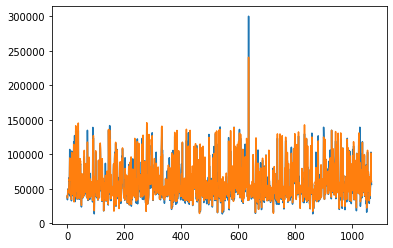

In [34]:
import matplotlib.pyplot as plt
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
mape

0.061145198

In [38]:
#실제값
inv_y

array([ 38981.223,  34086.617,  44169.42 , ..., 102928.82 ,  59894.9  ,
        56375.773], dtype=float32)

In [39]:
#예측값
inv_yhat

array([ 39615.07 ,  36646.86 ,  41856.938, ..., 101701.88 ,  62903.977,
        60237.207], dtype=float32)